<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Task 3</i></font></h1>

#### In this notebook we want to become more familiar with data visualization and classify data with Logistic Regression.

#####  <font color=slateblue>Importing Neccessary Libraries</font> ####

In [17]:
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd
import random
import itertools
import cv2 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from tabulate import tabulate

from sklearn.model_selection import train_test_split as trainTestSplitter
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix as plotConfMatrix
from sklearn.metrics import confusion_matrix as confMatrix

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import plot_precision_recall_curve as pltPrecisionRecallCurve
from sklearn.metrics import precision_recall_curve as precisionRecallCurve
from sklearn.metrics import roc_curve as ROC 

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Section 1: MNIST Dataset
You can find information about the dataset and download it from [here](https://www.kaggle.com/oddrationale/mnist-in-csv)(please download train dataset).


### <font color=mediumpurple>1:</font> ###

__Downloading the Dataset__



In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## Visualize Dataset
### <font color=mediumpurple>2:</font> ###

__Plot a Digit__


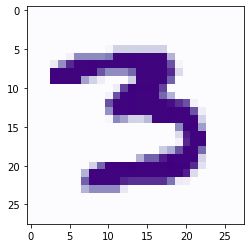

In [ ]:
reshapeSize = int(np.sqrt(len(X[0][:]))) 
n = random. sample(range(0, 70000), 1) #Choosing 1 random images to show

plt.imshow(X[n][:].reshape(reshapeSize, reshapeSize), cmap=plt.cm.Purples)
plt.show()

### <font color=mediumpurple>3:</font> ###

__Plot a Series of Instances of Each Class__


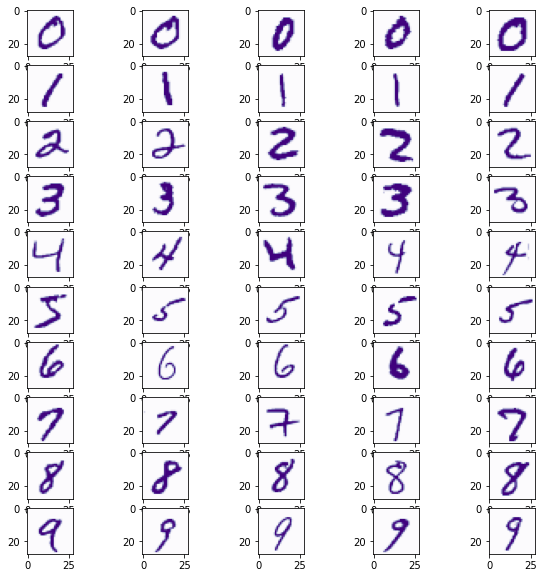

In [ ]:
fig, ax = plt.subplots(10, 5, figsize=(10,10))
for rowIndex, row in enumerate(ax):
  index = np.argwhere(y == str(rowIndex))[0:10]
  for clmIndex, clm in enumerate(row):
    clm.imshow(X[index[clmIndex]][:].reshape(reshapeSize, reshapeSize), cmap=plt.cm.Purples)
plt.show()

### <font color=mediumpurple>4:</font> ###

__Plot a Shifted Digit__


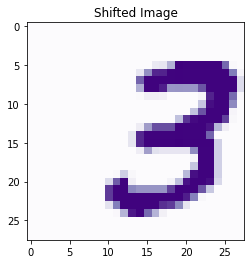

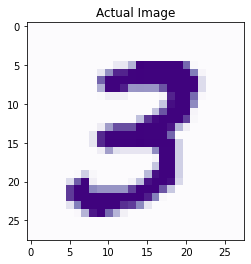

In [ ]:
n = 7

plt.title("Shifted Image")
plt.imshow(np.roll(X[n][:].reshape(reshapeSize, reshapeSize), 5), cmap=plt.cm.Purples)
plt.show()

plt.title("Actual Image")
plt.imshow(X[n][:].reshape(reshapeSize, reshapeSize), cmap=plt.cm.Purples)
plt.show()

## <font color=mediumpurple>Classification:</font> ##
In this part, you should do a binary classification to predict if a digit is '4' or not. report the requests listed below:

### <font color=mediumpurple>5:</font> ###

__Plot Confusion Matrix and ROC__

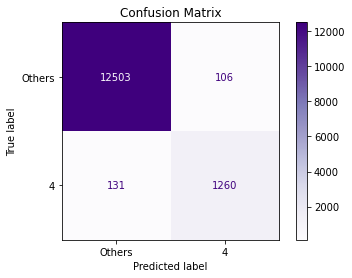

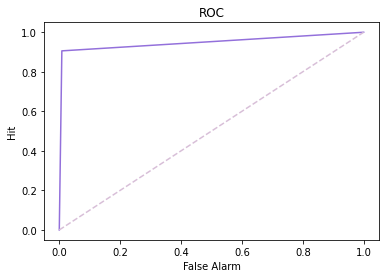

In [15]:
#Separating train and test data:
trainData, testData, trainLabels, testLabels = trainTestSplitter(X, y, 
                                                                 test_size =0.2, random_state=10)
#Defining Desired Labels:
goal = 1
others = 0

trainLabels = [goal if trainLabels[i]=='4' else others for i in range(len(trainLabels))]
testLabels = [goal if testLabels[i]=='4' else others for i in range(len(testLabels))]

#Employing the classifier:
myClf = LogisticRegression(tol=100, max_iter=10000).fit(trainData, trainLabels) 
predLabels = myClf.predict(testData)

#Confusion Matrix:
myConfMat = confMatrix(testLabels, predLabels)
disp = plotConfMatrix(myClf, testData, testLabels, display_labels=['Others', '4'], cmap=plt.cm.Purples, values_format='1.0f')
disp.ax_.set_title('Confusion Matrix')
plt.show()

#ROC:
falseAlarm, hit, threshold = ROC(testLabels, predLabels)
plt.plot(falseAlarm, hit, color='mediumpurple')
plt.plot([0, 1], [0, 1], '--', color='thistle')
plt.title("ROC")
plt.xlabel("False Alarm")
plt.ylabel("Hit")
plt.show()

### <font color=mediumpurple>6:</font> ###

__Show Accuracy, Recall, Precision, Sensivity, and Specifity__

In [16]:
print("\n Using sklearn's report we get: \n")
print(metrics.classification_report(testLabels, predLabels,
                                    target_names=['Others', 'goal']))


 Using sklearn's report we get: 

              precision    recall  f1-score   support

      Others       0.99      0.99      0.99     12609
        goal       0.92      0.91      0.91      1391

    accuracy                           0.98     14000
   macro avg       0.96      0.95      0.95     14000
weighted avg       0.98      0.98      0.98     14000



Note that sensivity is the same as recall, and the sensivity to "4" is actually the specificity to "Others". Therefore, a report same as above, gives all the resutls. 

### <font color=mediumpurple>7:</font> ###

__Precision-Recall Curve__

Text(0.5, 1.0, '2-Class Precision-Recall Curve: ')

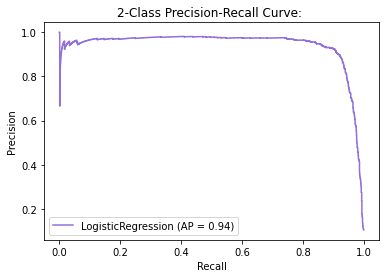

In [20]:
disp = pltPrecisionRecallCurve(myClf, testData, testLabels, color='mediumpurple')
disp.ax_.set_title('2-Class Precision-Recall Curve: ')

__Precision-Recall Curve with Respect to Threshold__

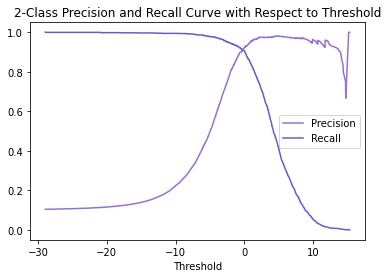

In [23]:
precision, recall, thresholds = precisionRecallCurve(testLabels, myClf.decision_function(testData))
plt.plot(thresholds, precision[:-1], color='mediumpurple', label='Precision')
plt.plot(thresholds, recall[:-1], color='slateblue', label='Recall')
plt.title('2-Class Precision and Recall Curve with Respect to Threshold')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

# Section 2: Titanic Dataset

You can find information about the dataset and download it from [here](https://www.kaggle.com/c/titanic/data)(please download train dataset).


In [24]:
data = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Hands On/3/train.csv')


In [25]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <font color=mediumpurple>Cleaning the Dataset:</font> ##
Do some process and answer to questions below:

1. Which columns have missing values?
#### <font color=mediumpurple>Answer:</font> ####
Based on the below code, it can be seen that "Age", "Cabin", and "Embarked" include rows with missing values. 


In [26]:
missingDataHeader = [name for name in data.head() if (pd.isna(data[name])).any()]
missingDataHeader

['Age', 'Cabin', 'Embarked']

2. How do you fill the missing values, and why do you use this approach?
#### <font color=mediumpurple>Answer:</font> ####
As was discussed in the tutorial, there are two ways to deal with missing data. One way is to eliminate them from the dataset. However, this solution can be helpful when there are enough data, which is not the case for this train dataset. In order to show the stated point, Let us remove the missing rows:

In [27]:
print("Dataset's shape wihtout dropping the missing data is:", data.shape, "\nAfter eliminating the missing data, dataset's shape is:", data.dropna().shape)

Dataset's shape wihtout dropping the missing data is: (891, 12) 
After eliminating the missing data, dataset's shape is: (183, 12)


As the above results suggest, most of training data are lost, which is not ideal for sure. Therefore, we need to employ the second approach. 

For the age case, the mean value of the before and after passengers are repleced by the missing data.

In [28]:
data.loc[(data["Age"].isna()), "Age"] = data[(~data["Age"].isna())]["Age"].mean()
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


As the above code suggests, we were successful in eliminating the missing data in the "Age" column. However, there are two additional columns in need of preprocessing. Let us discuss "Cabin". 

In [29]:
len(data[data['Cabin'].isna()])

687

As can be seen, among 891 rows, there are 687 rows that have no data in the "Cabin" column. In addition, since its data are unique strings, we can conclude that this feature is not a helpful one in the future usages for predicting which passsgers survive. Based on the given descriptions, it makes sense to remove this feature. 

In [30]:
data.drop(columns=['Cabin'], inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Now we need to fix the NaN data of Embarked. To do so, we need to gain insight of their number and index.

In [31]:
data[data["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


So since there are only two rows, we can check to see what Embarked is made up of or we can remove these two rows. However, let us employ the first method.

In [32]:
print("There are %d unique embarked ports passengers reach the ship." %(len(data["Embarked"].unique())))

There are 4 unique embarked ports passengers reach the ship.


This shows there are 3 different ports as well as the two rows containing loss data. Therefore, it is good ti see which ports are most likely and more popular among passengers.

In [33]:
print("There are %d passengers embarked from Southampton port" %(data[data.Embarked == 'S'].shape[0]))
print("There are %d passengers embarked from Cherbourg port" %(data[data.Embarked == 'C'].shape[0]))
print("There are %d passengers embarked from Queenstown port" %(data[data.Embarked == 'Q'].shape[0]))

There are 644 passengers embarked from Southampton port
There are 168 passengers embarked from Cherbourg port
There are 77 passengers embarked from Queenstown port


So based on the above stats, we can set the two missing data as "S".

In [34]:
data.loc[data["Embarked"].isna(), "Embarked"] = 'S'
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Now what we need to do, is to check whether there are any NaN values in the whole dataframe.

In [35]:
data.columns[data.isna().any()]

Index([], dtype='object')

So data is cleaned! 

## Exploratory Data Analysis

Answer to these questions by plot relating figures:

1. Compare the age distribution for survivors and the deceased. Do you see any interesting points?



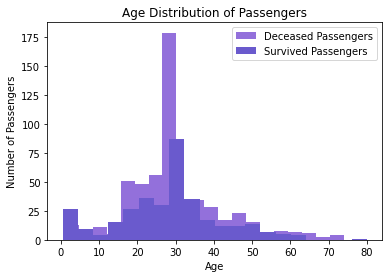

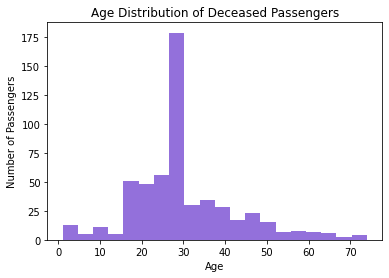

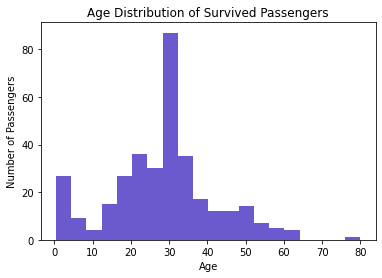

In [36]:
plt.hist(data[data["Survived"]==0]["Age"], bins=20, color='mediumpurple', label='Deceased Passengers')
plt.hist(data[data["Survived"]==1]["Age"], bins=20, color='slateblue', label='Survived Passengers')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Passengers")
plt.legend(loc="upper right")
plt.show()

plt.hist(data[data["Survived"]==0]["Age"], bins=20, color='mediumpurple', label='Deceased Passengers')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Deceased Passengers")
plt.show()

plt.hist(data[data["Survived"]==1]["Age"], bins=20, color='slateblue', label='Survived Passengers')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Survived Passengers")
plt.show()


As can be seen, most of the passengers are in their 20s, and mostly in their late 20s. Among all of them, as can be seen, about half survived. In addition, as we know, they tried to save children by the rescue boats. This fact is also clear in the last plot.

2. Compare the fare distribution for survivors and the deceased. Look at the features' description on Kaggle, is there any other feature that seems to be highly correlated to fare? Explain it.

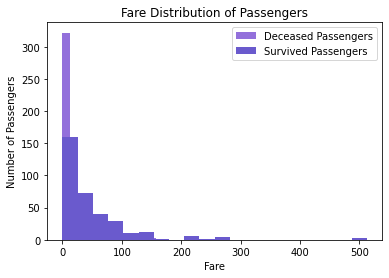

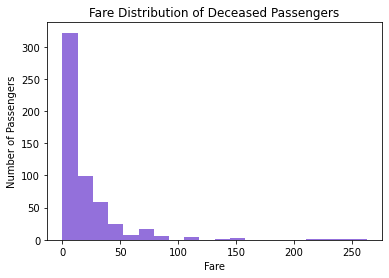

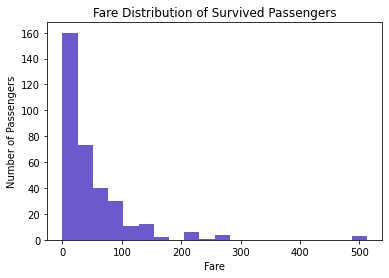

In [37]:
plt.hist(data[data["Survived"]==0]["Fare"], bins=20, color='mediumpurple', label='Deceased Passengers')
plt.hist(data[data["Survived"]==1]["Fare"], bins=20, color='slateblue', label='Survived Passengers')
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Fare Distribution of Passengers")
plt.legend(loc="upper right")
plt.show()

plt.hist(data[data["Survived"]==0]["Fare"], bins=20, color='mediumpurple', label='Deceased Passengers')
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Fare Distribution of Deceased Passengers")
plt.show()

plt.hist(data[data["Survived"]==1]["Fare"], bins=20, color='slateblue', label='Survived Passengers')
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Fare Distribution of Survived Passengers")
plt.show()

Based on the above plots, most of the passengers did not pay a large amount of fare. In addition, it can be seen that for the ones paying a large fare, almost everyone survived and none died. Also, it is prominent to note that among the ones that payed a small fare, almost half died in the Titanic accident.

Among all the given features, it is crystal clear that the ticket class is highly correlated with the amount of fare a passenger payed in order to board this ship.

3. Plot the survivors based on the embarked port. What do you see? Do you have any hypothesis? 

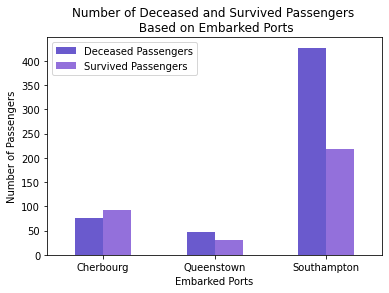

In [38]:
pd.crosstab(data['Embarked'], data['Survived']).plot(kind='bar', color=['slateblue', 'mediumpurple'])
plt.title('Number of Deceased and Survived Passengers \n Based on Embarked Ports')
plt.xticks(np.arange(3), ('Cherbourg', 'Queenstown', 'Southampton'), rotation=0)
plt.xlabel('Embarked Ports')
plt.ylabel("Number of Passengers")
plt.legend(loc="upper left", labels=['Deceased Passengers', 'Survived Passengers'])
plt.show()

Based on the above plot, most of the survivors embarked from Southampton port. A more detailed look suggests that the number of passengers embarking from Southampton port is more than the other two and so the number of survivors. However, the survival rate is larger in the other two ports as well. Keeping all these facts in mind, it is more likely that when our model predicts a passenger is among the survivors, he/she embarked from the Southampton port. 

4. Plot data based on traveling alone and with family (you may need to merge 2 columns of data somehow).


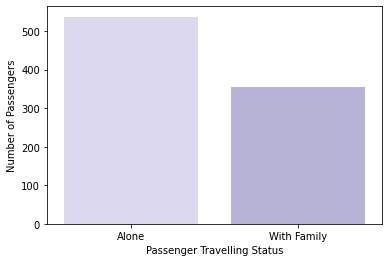

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [39]:
data["TripStat"] = data["SibSp"].add(data["Parch"], fill_value=0)
data.loc[data["TripStat"]>0, "TripStat"] = 1

sns.countplot(x="TripStat", data=data, palette = sns.cubehelix_palette(start=2.8, rot=.1))
plt.xticks(np.arange(2), ('Alone', 'With Family'), rotation=0)
plt.xlabel('Passenger Travelling Status')
plt.ylabel("Number of Passengers")
plt.show()

data.drop(columns=["TripStat"], inplace=True)
data

5. Which gender was more likely to survive? Do you know why?

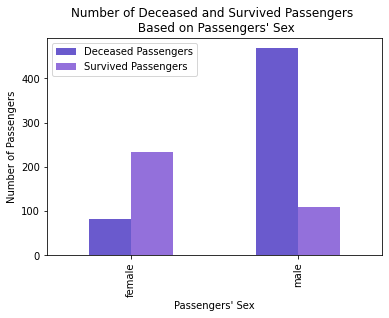

In [40]:
pd.crosstab(data['Sex'],data['Survived']).plot(kind='bar', color=['slateblue', 'mediumpurple'])
plt.title("Number of Deceased and Survived Passengers \n Based on Passengers' Sex")
plt.xlabel("Passengers' Sex")
plt.ylabel("Number of Passengers")
plt.legend(loc="upper left", labels=['Deceased Passengers', 'Survived Passengers'])
plt.show()

As can be seen, although the number of male passengers are more, the number of female survivors is greater. The reason behind this fact was that most life saving boats were filled with woman.

In addition to the "Cabin" column, there are two other columns which can be eliminated as well. "Name" and "Ticket" are the two candids. The reason lying behind this logic is that, "Name" of each passenger is unique and the uniqueness of "Tickets" can be checked as well. 

In [41]:
print("There are %d unique names in the ship." %(len(data["Name"].unique())))
print("There are %d unique ticket numbers in the ship." %(len(data["Ticket"].unique())))

There are 891 unique names in the ship.
There are 681 unique ticket numbers in the ship.


Both of the above results suggest that in order to reduce the dimension of our training dataset an eliminate the ones which are not practical, the two mentioned features are among the best candidates. Therefore, we have:

In [42]:
data.drop(columns=['Name', 'Ticket'], inplace=True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


There are also two features which are strings. In order to change them into numerical type same as the other features, we employ some processing. First of all, for the "Sex" column. We know that there are two values for each row. Therefore, we can represent females as 1 and males as 0.

In [43]:
data.loc[data["Sex"]=='female', "Sex"] = 1
data.loc[data["Sex"]=='male', "Sex"] = 0
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,S
1,2,1,1,1,38.000000,1,0,71.2833,C
2,3,1,3,1,26.000000,0,0,7.9250,S
3,4,1,1,1,35.000000,1,0,53.1000,S
4,5,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,S
887,888,1,1,1,19.000000,0,0,30.0000,S
888,889,0,3,1,29.699118,1,2,23.4500,S
889,890,1,1,0,26.000000,0,0,30.0000,C


In addition, the Embarked column needs to be changed too. S can be casted as 0, C as 1 and Q as 2. 

In [44]:
data.loc[data["Embarked"]=='S', "Embarked"] = 0
data.loc[data["Embarked"]=='C', "Embarked"] = 1
data.loc[data["Embarked"]=='Q', "Embarked"] = 2
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0
887,888,1,1,1,19.000000,0,0,30.0000,0
888,889,0,3,1,29.699118,1,2,23.4500,0
889,890,1,1,0,26.000000,0,0,30.0000,1


Now we can use logisitic regression on this dataset. 

## Classification
n this part, you should do a binary classification to predict if a passenger survives or not. report the requests listed below:
1. Plot Confusion Matrix and ROC


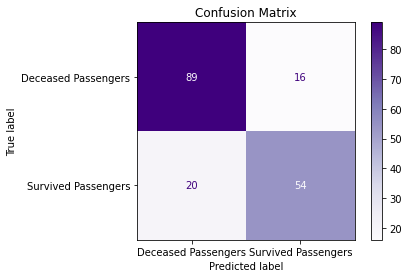

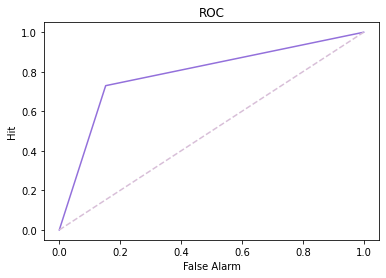

In [45]:
#Splitting train and test datasets:
trainData, testData, trainLabels, testLabels = trainTestSplitter(data.drop(columns=["PassengerId", "Survived"]), 
                                                                 data["Survived"], test_size=0.2, random_state=42)

#Employing the classifier:
myClf = LogisticRegression(max_iter=10000).fit(trainData, trainLabels) 
predLabels = myClf.predict(testData)

#Confusion Matrix:
myConfMat = confMatrix(testLabels, predLabels)
disp = plotConfMatrix(myClf, testData, testLabels, display_labels=['Deceased Passengers', 'Survived Passengers'], cmap=plt.cm.Purples, values_format='1.0f')
disp.ax_.set_title('Confusion Matrix')
plt.show()

#ROC:
falseAlarm, hit, threshold = ROC(testLabels, predLabels)
plt.plot(falseAlarm, hit, color='mediumpurple')
plt.plot([0, 1], [0, 1], '--', color='thistle')
plt.title("ROC")
plt.xlabel("False Alarm")
plt.ylabel("Hit")
plt.show()


2. Report Accuracy, Sensitivity, Specificity, Precision, and Recall.

In [46]:
print("\n Using sklearn's report we get: \n")
print(metrics.classification_report(testLabels, predLabels,
                                    target_names=['Deceased Passengers', 'Survived Passengers']))


 Using sklearn's report we get: 

                     precision    recall  f1-score   support

Deceased Passengers       0.82      0.85      0.83       105
Survived Passengers       0.77      0.73      0.75        74

           accuracy                           0.80       179
          macro avg       0.79      0.79      0.79       179
       weighted avg       0.80      0.80      0.80       179

